In [77]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [4]:
weather_df = pd.read_csv('./data/seattle_weather_2015_2016.csv')
# weather_df.head()

In [78]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [79]:
flights_by_airline_day = flights.groupby(['AIRLINE', 'DAY_OF_WEEK'])
taxi_out_mean = flights_by_airline_day['TAXI_OUT'].mean()
taxi_out_mean


AIRLINE  DAY_OF_WEEK
AA       1              17.753012
         2              17.857143
         3              17.114865
         4              19.252809
         5              17.442857
                          ...    
WN       3              11.876221
         4              12.523810
         5              12.373860
         6              11.100000
         7              11.621019
Name: TAXI_OUT, Length: 98, dtype: float64

Text(0, 0.5, 'Minutes')

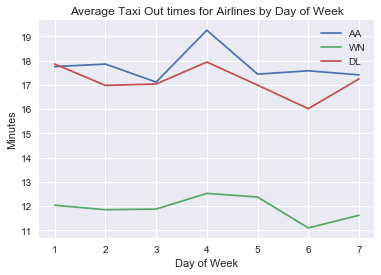

In [85]:
f,a = plt.subplots()
a.plot(taxi_out_mean.loc['AA'].index, taxi_out_mean.loc['AA'], label="AA")
a.plot(taxi_out_mean.loc['WN'].index, taxi_out_mean.loc['WN'], label="WN")
a.plot(taxi_out_mean.loc['DL'].index, taxi_out_mean.loc['DL'], label="DL")
a.legend()
a.set_title(label="Average Taxi Out times for Airlines by Day of Week")
a.set_xlabel("Day of Week")
a.set_ylabel("Minutes")

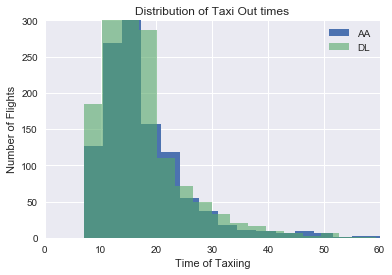

In [88]:
aa_taxi = flights[ flights['AIRLINE'] == 'AA'][['TAXI_OUT', 'TAXI_IN', 'DISTANCE']]
dl_taxi = flights[ flights['AIRLINE'] == 'DL'][['TAXI_OUT', 'TAXI_IN', 'DISTANCE']]
fig,ax = plt.subplots()
ax.hist(aa_taxi['TAXI_OUT'], bins=30, label="AA")
ax.hist(dl_taxi['TAXI_OUT'], alpha=.6, bins=30, label="DL")

ax.set_xlim(0,60)
ax.set_ylim(0,300)

ax.set_title(label="Distribution of Taxi Out times")
ax.set_xlabel("Time of Taxiing")
ax.set_ylabel("Number of Flights")

ax.legend()


(0, 300)

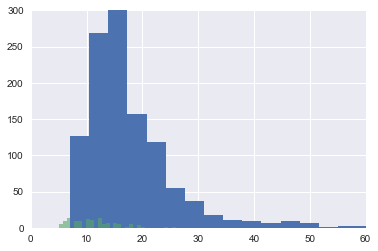

In [22]:
aa_taxi = flights[ flights['AIRLINE'] == 'AA'][['TAXI_OUT', 'TAXI_IN', 'DISTANCE']]
ha_taxi = flights[ flights['AIRLINE'] == 'HA'][['TAXI_OUT', 'TAXI_IN', 'DISTANCE']]
fig,ax = plt.subplots()
ax.hist(aa_taxi['TAXI_OUT'], bins=30)
ax.hist(ha_taxi['TAXI_OUT'], alpha=.6, bins=30)

ax.set_xlim(0,60)
ax.set_ylim(0,300)

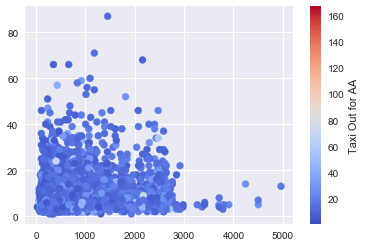

In [91]:
fig,ax = plt.subplots()
img1 = ax.scatter(flights['DISTANCE'],flights['TAXI_IN'],
          c=flights['TAXI_OUT'], cmap="coolwarm", label="AA")


fig.colorbar(img1, label="Taxi Out for AA")


In [30]:
flights_by_airline_and_day = flights.groupby(['AIRLINE', 'DAY_OF_WEEK'])
summary = flights_by_airline_and_day['TAXI_OUT'].median()
summary


AIRLINE  DAY_OF_WEEK
AA       1              15.0
         2              15.0
         3              15.0
         4              17.0
         5              16.0
                        ... 
WN       3              10.0
         4              11.0
         5              11.0
         6              10.0
         7              10.0
Name: TAXI_OUT, Length: 98, dtype: float64

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thur'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

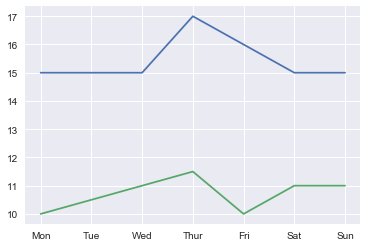

In [31]:

fig,ax = plt.subplots()

ax.plot(summary.loc['AA'].index,summary.loc['AA'] )
ax.plot(summary.loc['HA'].index,summary.loc['HA'] )
ax.set_xticks(range(1,8))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

In [36]:
def month_segment(day):
    if day < 8:
        return 1
    elif day < 15:
        return 2
    elif day < 23:
        return 3
    else:
        return 4

flights['MONTH_SEGMENT'] = flights['DAY'].apply(month_segment)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE,MONTH_SEGMENT
0,2015,8,19,3,EV,3260,7.0,20.0,1091,3
1,2015,9,23,3,WN,3050,4.0,9.0,837,4
2,2015,10,16,5,AA,1382,13.0,25.0,761,3
3,2015,1,19,1,WN,4274,5.0,23.0,1547,3
4,2015,4,22,3,WN,2237,5.0,18.0,872,3


In [54]:
flights_by_airline_and_segment = flights.groupby(['AIRLINE', 'MONTH_SEGMENT'])
summary = flights_by_airline_and_segment['TAXI_IN', 'TAXI_OUT'].mean()
summary[:4]

TAXI_IN   TAXI_OUT
AIRLINE MONTH_SEGMENT                     
AA      1              8.924686  17.711297
        2              9.257426  17.214521
        3              9.024465  18.339450
        4              9.131661  17.815047

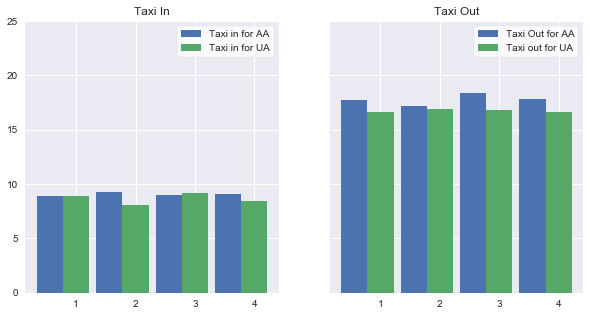

In [75]:
fig,ax = plt.subplots(1,2, sharey=True, figsize=(10,5))
width = .44
ax[0].bar(summary.loc['AA'].index - width, summary.loc['AA']['TAXI_IN'], width=width, label="Taxi in for AA")
ax[0].bar(summary.loc['UA'].index, summary.loc['UA']['TAXI_IN'], width=width, label="Taxi in for UA")

ax[0].set_xticks(range(1,5))


ax[1].bar(summary.loc['AA'].index - width, summary.loc['AA']['TAXI_OUT'], width=width, label="Taxi Out for AA")
ax[1].bar(summary.loc['UA'].index, summary.loc['UA']['TAXI_OUT'], width=width, label="Taxi out for UA")

ax[1].set_xticks(range(1,5))

ax[0].set_ylim(0,25)

ax[0].set_title(label="Taxi In")
ax[1].set_title(label="Taxi Out")

ax[0].legend(facecolor="white", frameon=True)
ax[1].legend(facecolor="white", frameon=True)